In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [54]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [128]:
import sys

In [2]:
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

In [61]:
%pycodestyle_off

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix

%matplotlib inline

# index
* [1.Load the data](#1.Load-the-data)
* [2.Reviw the data](#2.Review-the-data)
   * [2.1 missing value and basic description](#missing-value-&-the-basic-description)
   * [2.2 data profile](#data-profile)
   * [2.3 Analysis thefeatures](#Analysis-the-features)
* [3. Modeling](#3.Modeling)
   * [3.1 training the model ](#training-the-model)
   * [3.2 feature importance and explainability](#feature-importance-and-explainability)
* [4. Conclusion](#4.Conclusion)

# 1.Load the data

In [57]:
input_path = "default of credit card clients.xls"
df = pd.read_excel(input_path, header=1)
df.info()
df.head()
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


(30000, 25)

# 2.Review the data

# missing value & the basic description

In [22]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**There is no missing value in all the columns , so we don't need to deal with the missing value.**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [18]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

# check the outliers

<AxesSubplot:>

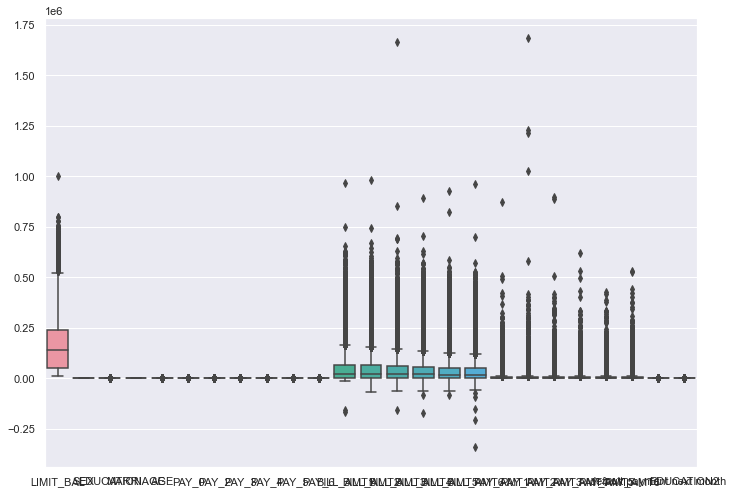

In [183]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df.drop(columns=['ID']))

BILL_AMOUT and PAY_AMOUT seems have some outliers in a large positive value. But because it the Money amout, it is likely  to be a long tail distribution. So I think it make sense, I don't deal with these "outliers".

# data-profile

In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report_ModelingTest")
profile.to_file("Report_ModelingTest.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

from  the html files, we have some feeling about the data.
1. The age variable has several high histograms.
2. The BILL_AMT1~6 contains some negative values
3. The default rate is 22% percent.
4. The pay_1 ~ pay_6 are highly correlated with bill_amt1 ~ bill_amt6
5. The bill_amt1 ~ bill_amt6 are highly correlated with pay_amt1 ~ pay_amt6

Next, we will check the above infomation and get a deeper understanding of the data.

# Analysis the features

# 1.Age

<AxesSubplot:xlabel='AGE', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AGE')

<AxesSubplot:xlabel='AGE', ylabel='default payment next month'>

Text(0.5, 1.0, 'Avg default rate of AGE')

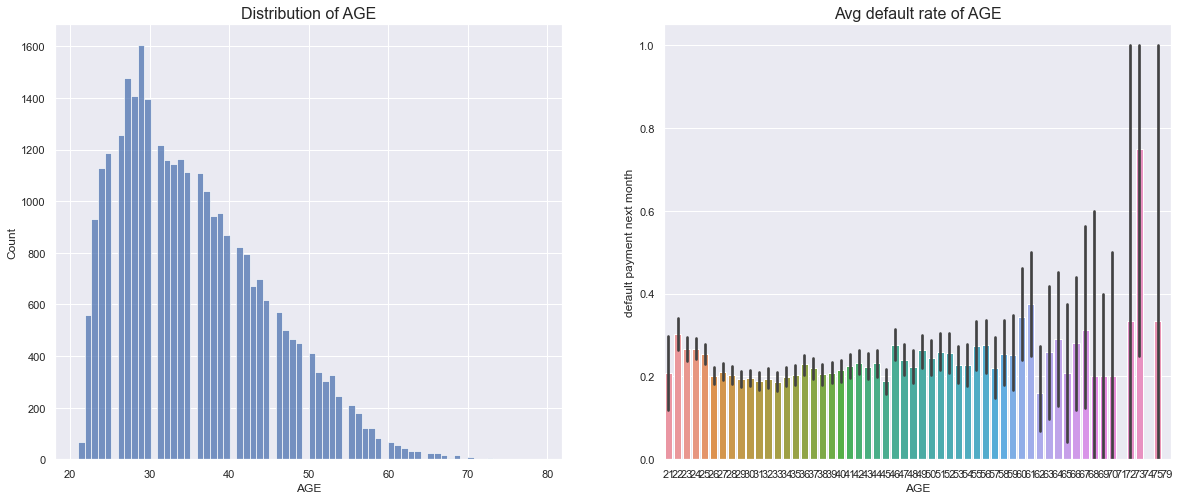

In [63]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
col = 'AGE'
sns.histplot(data=df, x=col,ax=ax[0])
ax[0].set_title(f'Distribution of {col}', fontsize=16)
sns.barplot(data=df,x=col,y='default payment next month',ax=ax[1])
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

**We can see that the clients whose age are lower(<24) and higher(>72) may have a higher default rate.**

# 2. SEX

,SEX,count,pct,avg_default_rate
1,2,18112,0.603733,0.207763
0,1,11888,0.396267,0.241672


<AxesSubplot:xlabel='SEX', ylabel='pct'>

<AxesSubplot:xlabel='SEX', ylabel='avg_default_rate'>

Text(0.5, 1.0, 'Distribution of SEX')

Text(0.5, 1.0, 'Avg default rate of SEX')

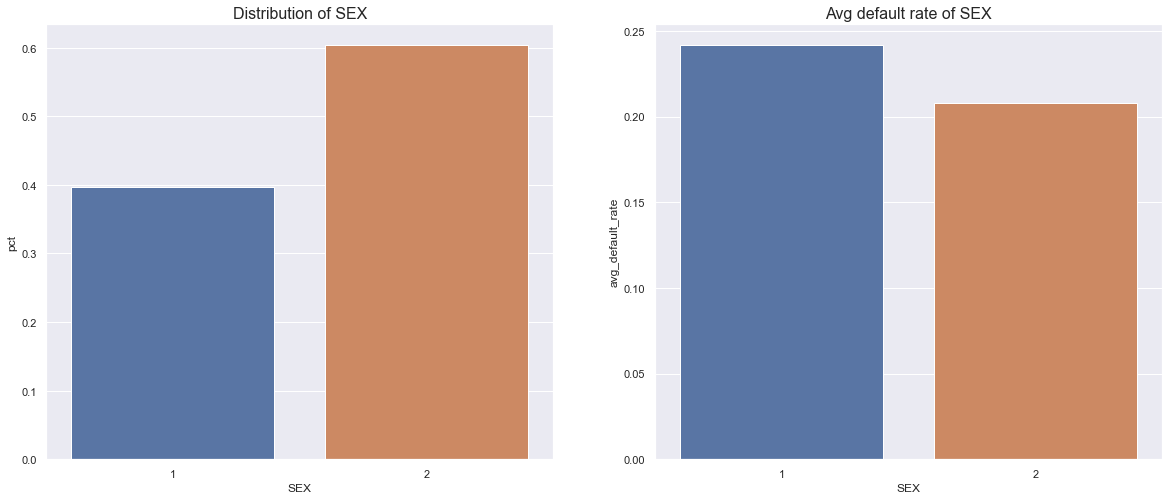

In [64]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
data = df
col = 'SEX'
target = 'default payment next month'
count = data.groupby(col)[target].count()
pct = count/data.shape[0]
rate = data.groupby(col)[target].mean()

tmp = pd.concat([count,pct,rate],axis=1)
tmp.columns = ['count','pct','avg_default_rate']
tmp=tmp.reset_index().sort_values(by='avg_default_rate')
tmp

sns.barplot(data=tmp,x=col,y='pct',ax=ax[0])
sns.barplot(data=tmp,x=col,y='avg_default_rate',ax=ax[1])

ax[0].set_title(f'Distribution of {col}', fontsize=16)
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

**Male i.e. SEX==1 has 40% in the sample, but 25% defaulr rate which is higher than female.**

# 3. EDUCATION

,EDUCATION,count,pct,avg_default_rate
0,zero,14,0.000467,0.000000
1,graduate school,10585,0.352833,0.192348
2,university,14030,0.467667,0.237349
3,high school,4917,0.163900,0.251576
4,others,123,0.004100,0.056911
5,unknown1,280,0.009333,0.064286
6,unknown2,51,0.001700,0.156863


<AxesSubplot:xlabel='EDUCATION', ylabel='pct'>

<AxesSubplot:xlabel='EDUCATION', ylabel='avg_default_rate'>

Text(0.5, 1.0, 'Distribution of EDUCATION')

<bound method Artist.set of <AxesSubplot:title={'center':'Distribution of EDUCATION'}, xlabel='EDUCATION', ylabel='pct'>>

Text(0.5, 1.0, 'Avg default rate of EDUCATION')

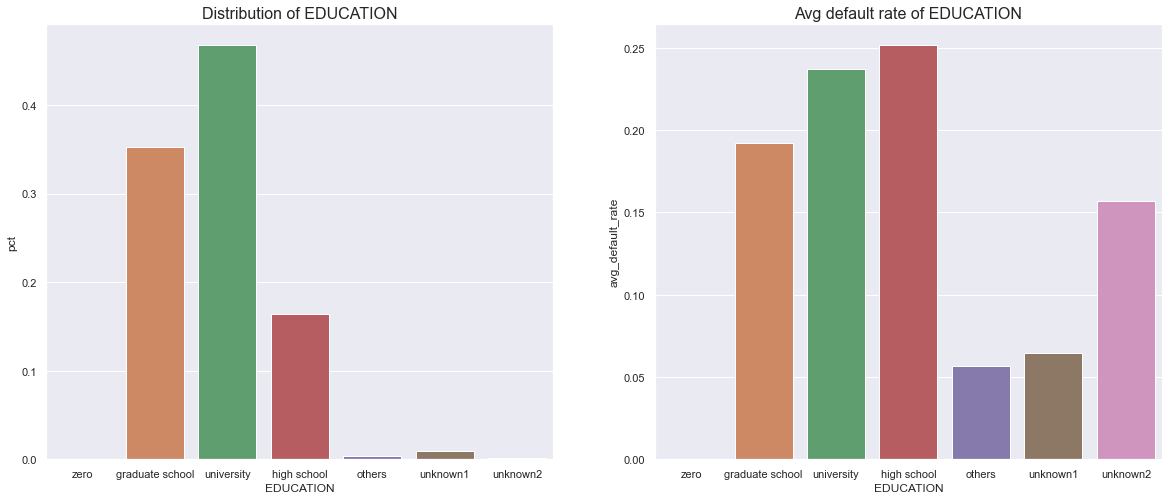

In [73]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
data = df
col = 'EDUCATION'
target = 'default payment next month'

d = {0:'zero',1:'graduate school',2:'university',3:'high school',4:'others',5:'unknown1',6:'unknown2'}

count = data.groupby(col)[target].count()
pct = count/data.shape[0]
rate = data.groupby(col)[target].mean()

tmp = pd.concat([count,pct,rate],axis=1)
tmp.columns = ['count','pct','avg_default_rate']
tmp=tmp.reset_index()#.sort_values(by='avg_default_rate')
tmp[col] = tmp[col].apply(lambda x:d[x])
tmp

sns.barplot(data=tmp,x=col,y='pct',ax=ax[0])
sns.barplot(data=tmp,x=col,y='avg_default_rate',ax=ax[1])

ax[0].set_title(f'Distribution of {col}', fontsize=16)
ax[0].set
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

We have some unknow values in the Education columns, like value 0,5,6. But this unknow value only have about 1% in the data and the default rate is quiet low. We can just ignore these value. It won't affect the result.

But from the knowing value 1~3, we can find out that the higher the education level, the lower risk.

If we want to get more meaningful variable, we should reorder this columns by using the average of the target like below,but in this case, I don't use the reorder.

In [80]:
data = df
col = 'EDUCATION'
target = 'default payment next month'
rate = data.groupby(col)[target].mean()
rate = rate.sort_values()
rate

reorder_edu = { k:v for k,v in zip(rate.index, range(len(rate)))}
reorder_edu
df['EDUCATION2'] = df['EDUCATION'].apply(lambda x: reorder_edu[x])
df[['EDUCATION','EDUCATION2']].sample(5)

EDUCATION
0    0.000000
4    0.056911
5    0.064286
6    0.156863
1    0.192348
2    0.237349
3    0.251576
Name: default payment next month, dtype: float64

{0: 0, 4: 1, 5: 2, 6: 3, 1: 4, 2: 5, 3: 6}

,EDUCATION,EDUCATION2
23719,3,6
25566,2,5
231,2,5
22459,2,5
24650,2,5


# 4. MARRIAGE

,MARRIAGE,count,pct,avg_default_rate
0,zero,54,0.001800,0.092593
1,married,13659,0.455300,0.234717
2,single,15964,0.532133,0.209283
3,others,323,0.010767,0.260062


<AxesSubplot:xlabel='MARRIAGE', ylabel='pct'>

<AxesSubplot:xlabel='MARRIAGE', ylabel='avg_default_rate'>

Text(0.5, 1.0, 'Distribution of MARRIAGE')

<bound method Artist.set of <AxesSubplot:title={'center':'Distribution of MARRIAGE'}, xlabel='MARRIAGE', ylabel='pct'>>

Text(0.5, 1.0, 'Avg default rate of MARRIAGE')

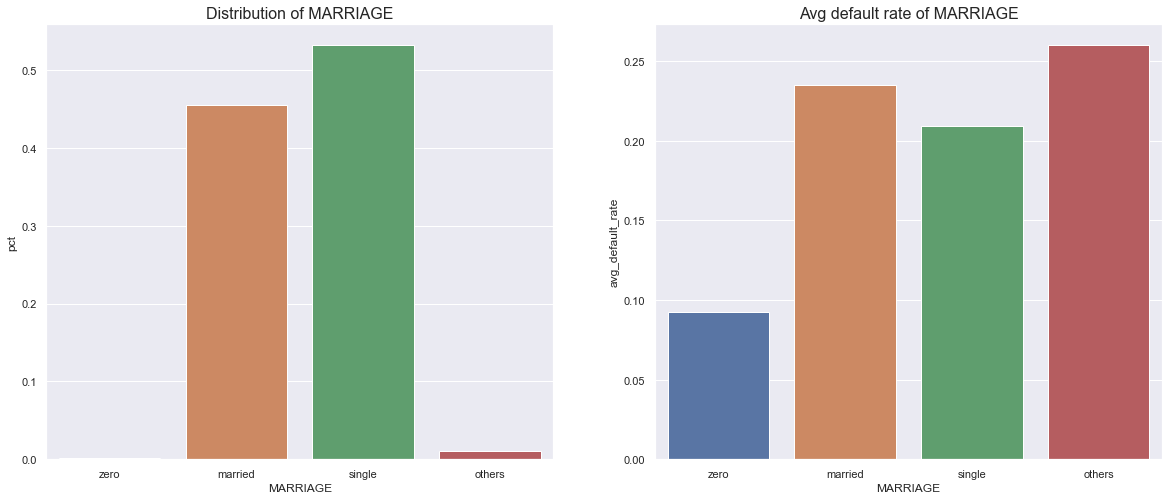

In [83]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
data = df
col = 'MARRIAGE'
target = 'default payment next month'

d = {0:'zero',1:'married',2:'single',3:'others'}

count = data.groupby(col)[target].count()
pct = count/data.shape[0]
rate = data.groupby(col)[target].mean()

tmp = pd.concat([count,pct,rate],axis=1)
tmp.columns = ['count','pct','avg_default_rate']
tmp=tmp.reset_index()#.sort_values(by='avg_default_rate')
tmp[col] = tmp[col].apply(lambda x:d[x])
tmp

sns.barplot(data=tmp,x=col,y='pct',ax=ax[0])
sns.barplot(data=tmp,x=col,y='avg_default_rate',ax=ax[1])

ax[0].set_title(f'Distribution of {col}', fontsize=16)
ax[0].set
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

"Others" marriage status has a higher risk than the other two. Married status has a higher risk than single.

We has some unkonwed value in the MARRIAGE, like the 0. But because the percentage of it is quite low, so I don't deal with the zeros. 

# 5. LIMIT_BAL

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of LIMIT_BAL')

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='default payment next month'>

Text(0.5, 1.0, 'Avg default rate of LIMIT_BAL')

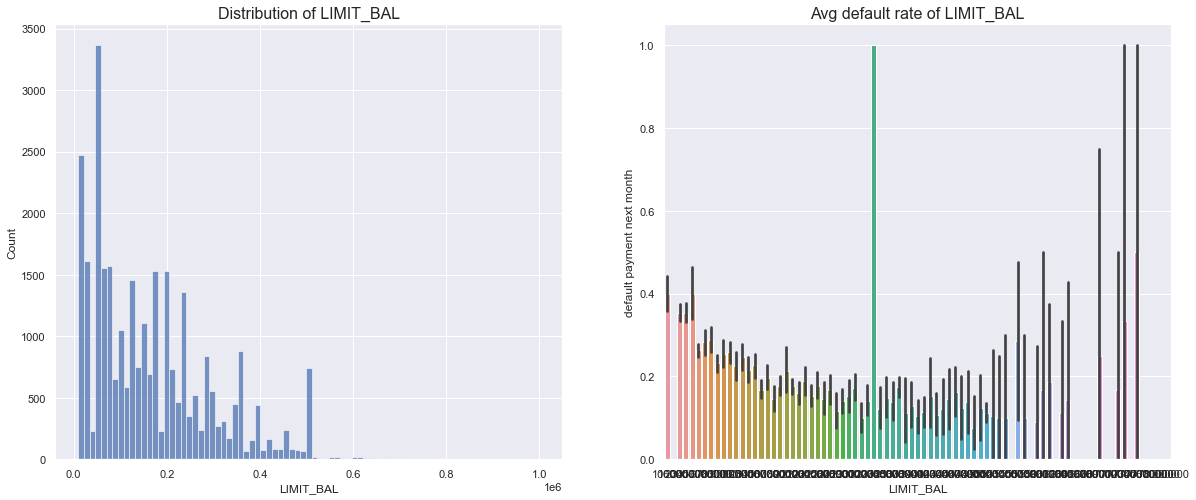

In [87]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
col = 'LIMIT_BAL'
sns.histplot(data=df, x=col,ax=ax[0])
ax[0].set_title(f'Distribution of {col}', fontsize=16)
sns.barplot(data=df,x=col,y='default payment next month',ax=ax[1])
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

**The relationship between the LIMIT_BAL and the average default rate is a U-shape.**

# 6. PAY_0

<AxesSubplot:xlabel='PAY_0', ylabel='count'>

Text(0.5, 1.0, 'Distribution of PAY_0')

<AxesSubplot:xlabel='PAY_0', ylabel='default payment next month'>

Text(0.5, 1.0, 'Avg default rate of PAY_0')

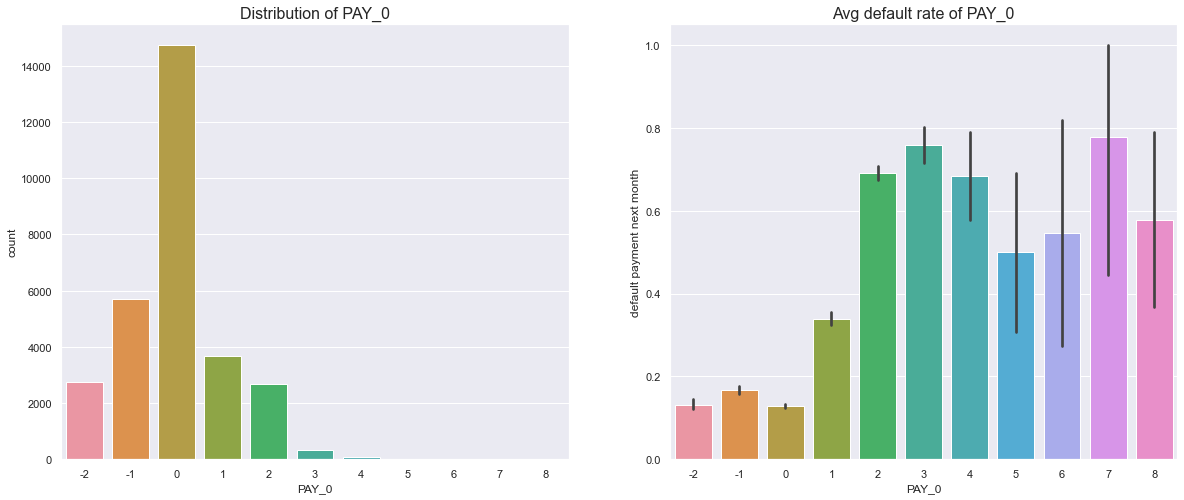

In [89]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
col = 'PAY_0'
sns.countplot(data=df, x=col,ax=ax[0])
ax[0].set_title(f'Distribution of {col}', fontsize=16)
sns.barplot(data=df,x=col,y='default payment next month',ax=ax[1])
ax[1].set_title(f'Avg default rate of {col}', fontsize=16)

In general, the higher the PAY_0, the Higher risk.

# 7. BILL_AMT1

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of BILL_AMT1')

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Density'>

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of BILL_AMT1 in different target')

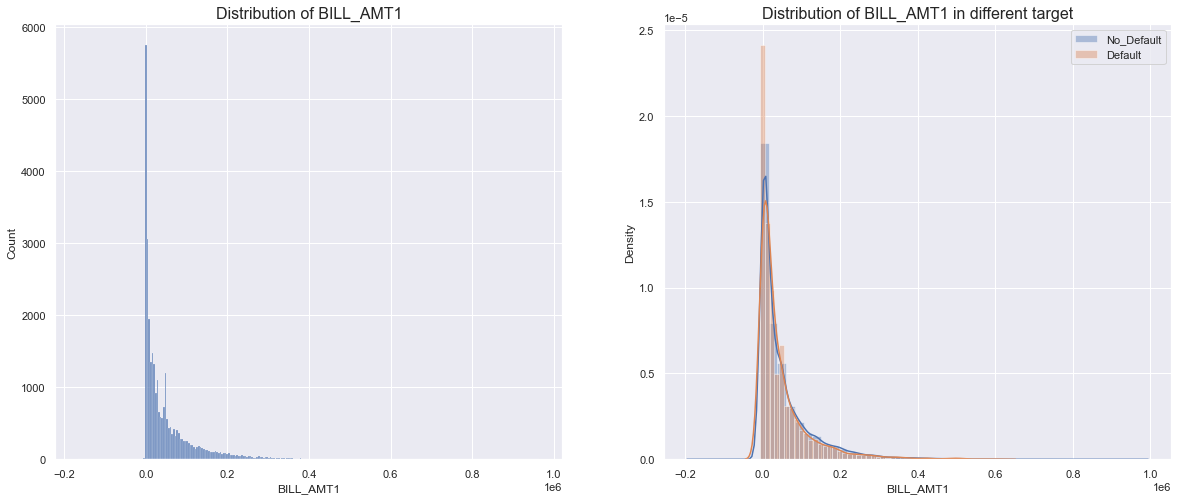

In [140]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
col = 'BILL_AMT1'
sns.histplot(data=df, x=col,ax=ax[0])
ax[0].set_title(f'Distribution of {col}', fontsize=16)


sns.distplot(df[df[target]==0][col],label='No_Default',ax=ax[1])
sns.distplot(df[df[target]==1][col],label='Default',ax=ax[1])
plt.legend()
ax[1].set_title(f'Distribution of {col} in different target', fontsize=16)


In [148]:
num_bins=20
q= [round(i*(1/num_bins),3) for i in range(num_bins)]
bins = pd.qcut(df[col],q)

data = df.copy()
data['bins'] = bins

count = data.groupby('bins')[target].count()
pct = count/data.shape[0]
rate = data.groupby('bins')[target].mean()

tmp = pd.concat([count,pct,rate],axis=1)
tmp.columns = ['count','pct','avg_default_rate']
tmp=tmp.reset_index()#.sort_values(by='avg_default_rate')
tmp

,bins,count,pct,avg_default_rate
0,"(-165580.001, 0.0]",2598,0.086600,0.247498
1,"(0.0, 278.9]",402,0.013400,0.223881
2,"(278.9, 800.85]",1500,0.050000,0.250667
3,"(800.85, 1892.8]",1500,0.050000,0.192667
4,"(1892.8, 3558.75]",1500,0.050000,0.218000
5,"(3558.75, 6050.4]",1500,0.050000,0.194000
6,"(6050.4, 9157.95]",1500,0.050000,0.230000
7,"(9157.95, 13469.2]",1500,0.050000,0.212000
8,"(13469.2, 17723.0]",1501,0.050033,0.267821
9,"(17723.0, 22381.5]",1499,0.049967,0.242829


<AxesSubplot:xlabel='bins', ylabel='pct'>

<AxesSubplot:xlabel='bins', ylabel='avg_default_rate'>

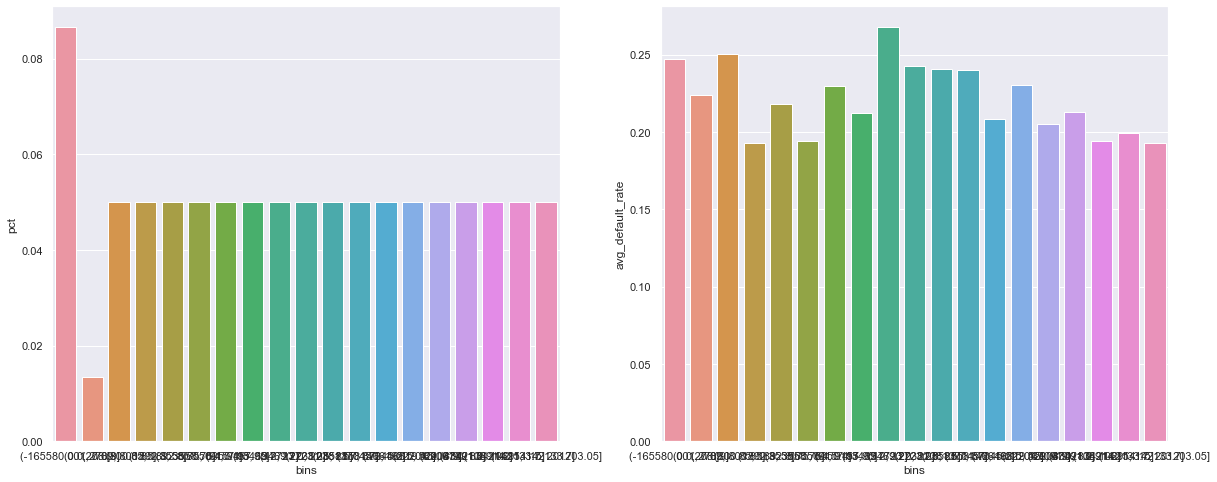

In [156]:
col = 'bins'
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.barplot(data=tmp,x=col,y='pct',ax=ax[0])
sns.barplot(data=tmp,x=col,y='avg_default_rate',ax=ax[1])

Not a linear relationship.

# 8. PAY_AMT1

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Count'>

(0.0, 75000.0)

Text(0.5, 1.0, 'Distribution of PAY_AMT1')

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Density'>

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Density'>

(0.0, 75000.0)

Text(0.5, 1.0, 'Distribution of PAY_AMT1 in different target')

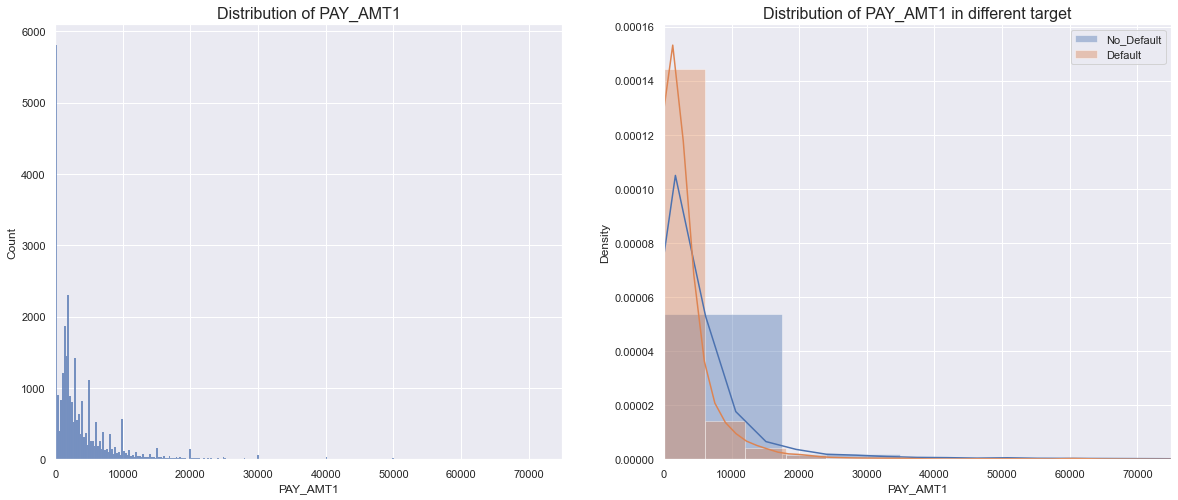

In [178]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
col = 'PAY_AMT1'
sns.histplot(data=df, x=col,ax=ax[0])
ax[0].set_xlim(0,75000)
ax[0].set_title(f'Distribution of {col}', fontsize=16)



sns.distplot(df[df[target]==0][col],label='No_Default',ax=ax[1])
sns.distplot(df[df[target]==1][col],label='Default',ax=ax[1])
plt.legend()
ax[1].set_xlim(0,75000)
ax[1].set_title(f'Distribution of {col} in different target', fontsize=16)

In [181]:
num_bins=20
q= [round(i*(1/num_bins),3) for i in range(num_bins)]
bins = pd.qcut(df[col],q,duplicates='drop')

data = df.copy()
data['bins'] = bins

count = data.groupby('bins')[target].count()
pct = count/data.shape[0]
rate = data.groupby('bins')[target].mean()

tmp = pd.concat([count,pct,rate],axis=1)
tmp.columns = ['count','pct','avg_default_rate']
tmp=tmp.reset_index()#.sort_values(by='avg_default_rate')
tmp

,bins,count,pct,avg_default_rate
0,"(-0.001, 316.0]",6002,0.200067,0.342219
1,"(316.0, 1000.0]",1837,0.061233,0.234077
2,"(1000.0, 1263.7]",1161,0.038700,0.214470
3,"(1263.7, 1500.0]",1793,0.059767,0.235360
4,"(1500.0, 1724.0]",1210,0.040333,0.216529
5,"(1724.0, 2000.0]",2412,0.080400,0.230100
6,"(2000.0, 2100.0]",598,0.019933,0.162207
7,"(2100.0, 2600.0]",1539,0.051300,0.224172
8,"(2600.0, 3000.0]",1564,0.052133,0.214194
9,"(3000.0, 3571.35]",1384,0.046133,0.213150


<AxesSubplot:xlabel='bins', ylabel='pct'>

<AxesSubplot:xlabel='bins', ylabel='avg_default_rate'>

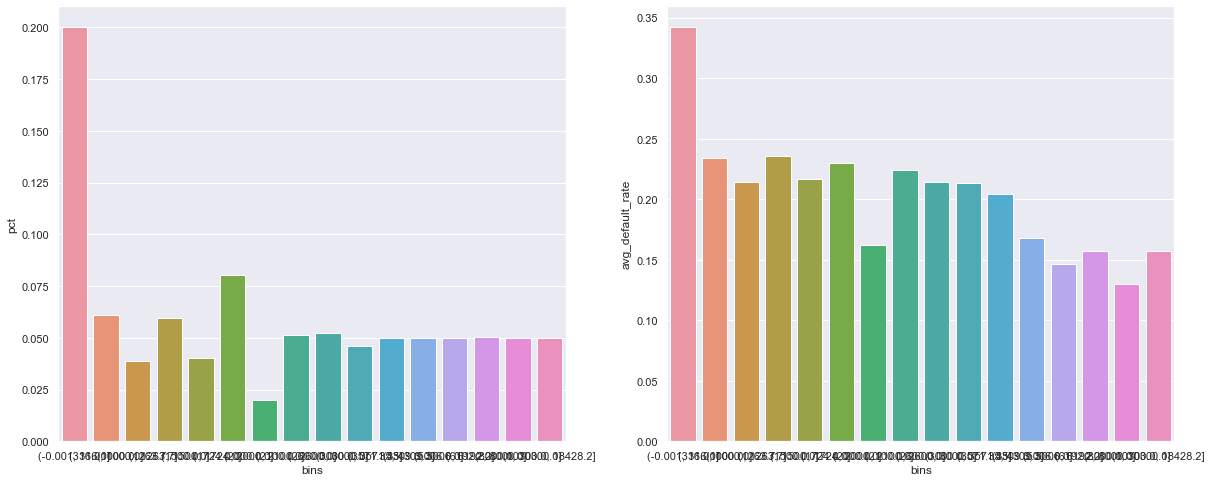

In [182]:
col = 'bins'
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.barplot(data=tmp,x=col,y='pct',ax=ax[0])
sns.barplot(data=tmp,x=col,y='avg_default_rate',ax=ax[1])

The higher pay_amt1, the lower risk.

# 3.Modeling

From the feature analysis above, If we want to keep the model have pretty good explainability, we will use Weight of Evidence to transform the features , then use Logistic Regression.

But WOE is time-consumeing, So here I will directly use some simple modeling methods.

Here I use LightGBM to train the model, just because of these reasons:
1. LightGBM has higher accuracy
2. LightGBM can deal with the catagorical data. Although we can label the catagorical features, but in this case, I want to speed up the training process.
3. LighGBM runs fast.


# training the model 

In [111]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION2'],
      dtype='object')

In [112]:
from sklearn.model_selection import train_test_split

features = [
       'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'
    , 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
    , 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
    , 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
           ]


cate_features = ['SEX','EDUCATION','MARRIAGE']

X = df[features]
y = df['default payment next month']

X.dtypes

# transfer some features into category feature
for c in cate_features:
    X[c] = X[c].astype('category')

X.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
dtype: object

In [113]:
# split training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
X_train.shape, X_test.shape

((20100, 23), (9900, 23))

In [114]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }


#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

clf.fit(X_train, y_train, **fit_params)


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, subsample=0.9)

In [115]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_proba = clf.predict_proba(X_train)
y_test_proba = clf.predict_proba(X_test)

In [116]:
from sklearn import metrics
report = metrics.classification_report(y_test,y_test_pred)
print(report)
train_auc = metrics.roc_auc_score(y_train,y_train_proba[:,1])
test_auc = metrics.roc_auc_score(y_test,y_test_proba[:,1])
train_auc,test_auc

(0.8201940958265221, 0.7811186918489301)

(0.8201940958265221, 0.7811186918489301)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

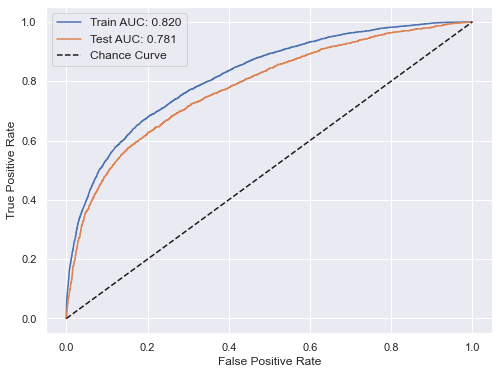

In [117]:
from sklearn.metrics import roc_curve,auc
fpr_train, tpr_train,th_train = roc_curve(y_train,y_train_proba[:,1],pos_label=1)
fpr_test, tpr_test,th_test = roc_curve(y_test,y_test_proba[:,1],pos_label=1)

train_auc = auc(fpr_train,tpr_train)
test_auc = auc(fpr_test,tpr_test)

train_auc,test_auc

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(fpr_train,tpr_train,label = f'Train AUC: {train_auc:.3f}')
ax.plot(fpr_test,tpr_test,label = f'Test AUC: {test_auc:.3f}')

ax.plot(fpr_train, fpr_train, 'k--', label='Chance Curve')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

In [118]:
def cal_ks(scores,labels,num_bins=10,EPS=1e-7):
    table = pd.DataFrame(zip(scores,labels),columns=['score','label'])
    table['score_rank_pct'] = table['score'].rank(na_option='bottom',pct=True)
    ## cut into bins
    q= [round(i*(1/num_bins),3) for i in range(num_bins)]
    q.insert(0,float('-inf'))
    q.append(float('inf'))
    table['rank_bins'] = pd.cut(table['score_rank_pct'],q)
    # 
    res = table.groupby('rank_bins').agg({'score':['max','min','count'],'label':['sum']})
    res.columns = ['score_max','score_min','count_all','count_1']
    res['count_0'] = res['count_all']-res['count_1']
    res['margin_1_rate'] = round(res['count_1']/res['count_1'].sum()*100,2)
    res['margin_0_rate'] = round(res['count_0']/res['count_0'].sum()*100,2)
    res['cumcount_1'] = res['count_1'].cumsum()
    res['cumcount_0'] = res['count_0'].cumsum()
    res['cumcount_all'] = res['count_all'].cumsum()
    res['cumpct_all'] = round(res['cumcount_all']/res['count_all'].sum()*100,2)
    res['cumpct_1']=round(res['cumcount_1']/res['count_1'].sum()*100,2)
    res['cumpct_0']=round(res['cumcount_0']/res['count_0'].sum()*100,2)
    res['_ks'] = res['cumpct_0']-res['cumpct_1']
    res['_woe'] = np.log((res['margin_1_rate']+EPS)/(res['margin_0_rate']+EPS))
    res['_iv'] = (res['margin_1_rate']-res['margin_0_rate'])*res['_woe']
    
    return res['_ks'].max(),res
    

In [134]:
ks_train,ks_table_train = cal_ks(y_train_proba[:,1],y_train)
ks_test,ks_table_test = cal_ks(y_test_proba[:,1],y_test)
ks_train,ks_test
ks_table_train
ks_table_test

(47.79999999999999, 42.38999999999999)

,score_max,score_min,count_all,count_1,count_0,margin_1_rate,margin_0_rate,cumcount_1,cumcount_0,cumcount_all,cumpct_all,cumpct_1,cumpct_0,_ks,_woe,_iv
rank_bins,,,,,,,,,,,,,,,,
"(-inf, 0.0]",NaN,NaN,0,0,0,0.00,0.00,0,0,0,0.0,0.00,0.00,0.00,0.000000,0.000000
"(0.0, 0.1]",0.063856,0.022775,2010,36,1974,0.81,12.61,36,1974,2010,10.0,0.81,12.61,11.80,-2.745211,32.393491
"(0.1, 0.2]",0.084303,0.063857,2010,91,1919,2.05,12.26,127,3893,4020,20.0,2.86,24.87,22.01,-1.788502,18.260606
"(0.2, 0.3]",0.103297,0.084312,2010,125,1885,2.81,12.04,252,5778,6030,30.0,5.67,36.91,31.24,-1.455050,13.430111
"(0.3, 0.4]",0.125756,0.103329,2010,199,1811,4.48,11.57,451,7589,8040,40.0,10.14,48.48,38.34,-0.948792,6.726939
"(0.4, 0.5]",0.149166,0.125761,2010,267,1743,6.01,11.13,718,9332,10050,50.0,16.15,59.61,43.46,-0.616219,3.155043
"(0.5, 0.6]",0.177263,0.149183,2010,329,1681,7.40,10.74,1047,11013,12060,60.0,23.55,70.35,46.80,-0.372495,1.244134
"(0.6, 0.7]",0.224241,0.177272,2009,410,1599,9.22,10.21,1457,12612,14069,70.0,32.77,80.57,47.80,-0.101993,0.100973
"(0.7, 0.8]",0.311883,0.224275,2011,577,1434,12.98,9.16,2034,14046,16080,80.0,45.75,89.73,43.98,0.348564,1.331513


,score_max,score_min,count_all,count_1,count_0,margin_1_rate,margin_0_rate,cumcount_1,cumcount_0,cumcount_all,cumpct_all,cumpct_1,cumpct_0,_ks,_woe,_iv
rank_bins,,,,,,,,,,,,,,,,
"(-inf, 0.0]",NaN,NaN,0,0,0,0.00,0.00,0,0,0,0.00,0.00,0.00,0.00,0.000000,0.000000
"(0.0, 0.1]",0.064031,0.024044,990,48,942,2.19,12.22,48,942,990,10.00,2.19,12.22,10.03,-1.719172,17.243299
"(0.1, 0.2]",0.085301,0.064032,990,60,930,2.74,12.06,108,1872,1980,20.00,4.93,24.28,19.35,-1.481936,13.811646
"(0.2, 0.3]",0.103942,0.085344,988,86,902,3.93,11.70,194,2774,2968,29.98,8.86,35.98,27.12,-1.090949,8.476677
"(0.3, 0.4]",0.125249,0.103971,992,119,873,5.43,11.32,313,3647,3960,40.00,14.29,47.30,33.01,-0.734632,4.326982
"(0.4, 0.5]",0.148817,0.125277,990,146,844,6.67,10.95,459,4491,4950,50.00,20.96,58.25,37.29,-0.495720,2.121680
"(0.5, 0.6]",0.177044,0.148817,990,146,844,6.67,10.95,605,5335,5940,60.00,27.63,69.20,41.57,-0.495720,2.121680
"(0.6, 0.7]",0.222332,0.177063,990,205,785,9.36,10.18,810,6120,6930,70.00,36.99,79.38,42.39,-0.083980,0.068863
"(0.7, 0.8]",0.309041,0.222332,990,263,727,12.01,9.43,1073,6847,7920,80.00,49.00,88.81,39.81,0.241844,0.623956


From  the table above, we can see the best cut-off for predicting a client is default is when this client get a probability of default over 0.6, we can assume this client is highly default.

Text(0.5, 1.0, 'The KS in testing data')

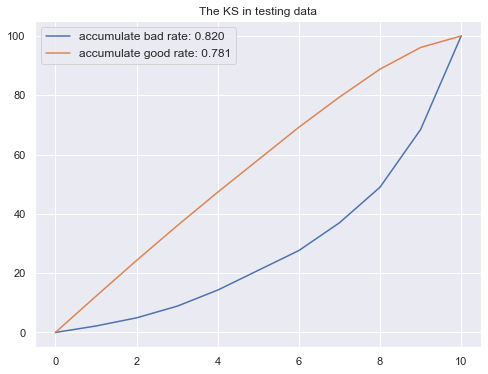

In [177]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ks_table_test['cumpct_1'],label = f'accumulate bad rate: {train_auc:.3f}')
ax.plot(ks_table_test['cumpct_0'],label = f'accumulate good rate: {test_auc:.3f}')
ax.grid(True)
ax.legend(fontsize=12)
ax.set_title("The KS in testing data")
plt.show()

This model has a 0.82 auc in training data, and 0.78 auc in testing data.

For the KS-statistic , it is 48% in training data and 42 in testing data.

So we can consider this model has a good performance.

# feature importance and explainability

<AxesSubplot:>

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fe5e76619a0>,
 [Text(0, 0.5, 'PAY_5'),
  Text(0, 1.5, 'MARRIAGE'),
  Text(0, 2.5, 'SEX'),
  Text(0, 3.5, 'EDUCATION'),
  Text(0, 4.5, 'BILL_AMT6'),
  Text(0, 5.5, 'PAY_3'),
  Text(0, 6.5, 'BILL_AMT5'),
  Text(0, 7.5, 'BILL_AMT4'),
  Text(0, 8.5, 'PAY_4'),
  Text(0, 9.5, 'PAY_2'),
  Text(0, 10.5, 'PAY_6'),
  Text(0, 11.5, 'BILL_AMT3'),
  Text(0, 12.5, 'BILL_AMT2'),
  Text(0, 13.5, 'AGE'),
  Text(0, 14.5, 'PAY_AMT6'),
  Text(0, 15.5, 'PAY_AMT5'),
  Text(0, 16.5, 'PAY_AMT4'),
  Text(0, 17.5, 'PAY_AMT3'),
  Text(0, 18.5, 'PAY_AMT2'),
  Text(0, 19.5, 'PAY_0'),
  Text(0, 20.5, 'PAY_AMT1'),
  Text(0, 21.5, 'LIMIT_BAL'),
  Text(0, 22.5, 'BILL_AMT1')])

Text(0.5, 1.0, 'Feature Importance (impurity-based feature importances)')

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5e772c370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5e772ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5e771cfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe5e7738130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5e766d3a0>,
 'means': []}

Text(0.5, 1.0, 'Permutation Importance (test set)')

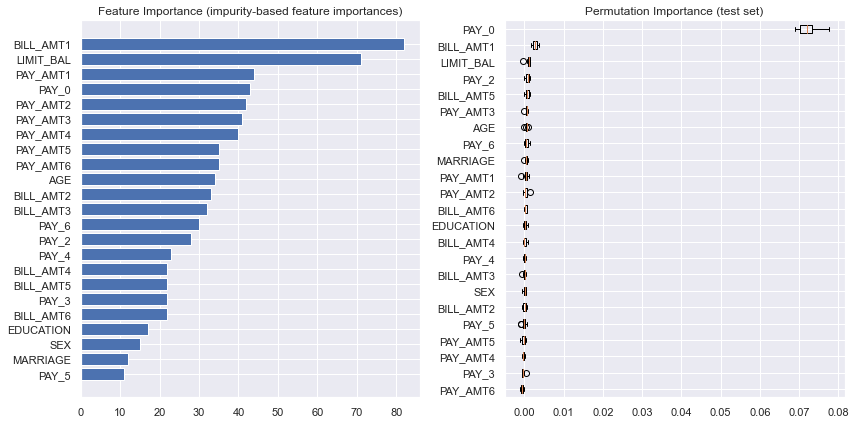

In [136]:
from sklearn.inspection import permutation_importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (impurity-based feature importances)")

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


we can see from the picture above , the most important features in this model are: 

**BILL_AMT1, PAY_0,LIMIT_BAL**

In [138]:
import shap
shap.initjs()
shap_values = shap.TreeExplainer(clf.booster_).shap_values(X_train)
len(shap_values),len(shap_values[0])
if len(shap_values) == 2:
    shap_values = shap_values[1]

(2, 20100)

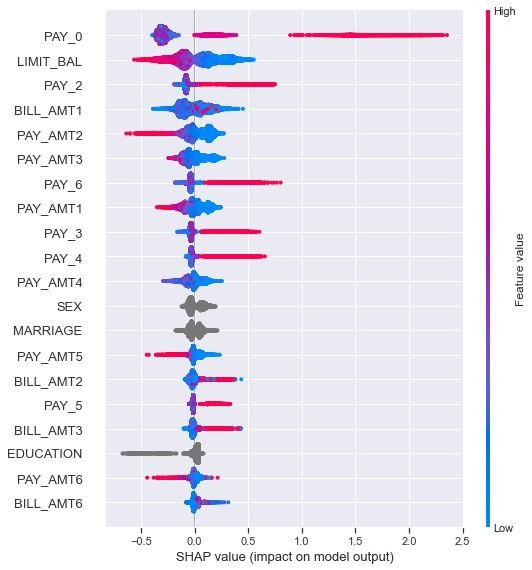

In [139]:
shap.summary_plot(shap_values, X_train)

From the picture above,we can get these informations:
1. PAY_0 is the most influence feature in this model. If a the payment delayed longer, the higher risk she/he will  be default.
2. LIMIT_BAL has negative influence in model. It also make sense, because the limit we made was base on the risk level.
3. BILL_AMT1 has no clear linear relationship with the target.
4. PAY_AMT1 has a negative influence in predicting a client is likely to be default.

# 4.Conclusion

## 1. Data Quality

There is no missing value in all the columns , so we don't need to deal with the missing value.

BILL_AMOUT and PAY_AMOUT seems have some outliers in a large positive value. But because it the Money amount, it is likely to be a long tail distribution. So I think it make sense, I don't deal with these "outliers".


## 2. Features

### 2.1 AGE

We can see that the clients whose age are lower(<24) and higher(>72) may have a higher default rate.

### 2.2 SEX
Male i.e. SEX==1 has 40% in the sample, but 25% defaulr rate which is higher than female.

### 2.3 EDUCATION
We have some unknow values in the Education columns, like value 0,5,6. But this unknowed value only have about 1% in the data and the default rate is quite low. We can just ignore these value. It won't affect the result.

But from the knowing value 1~3, we can find out that the higher the education level, the lower risk.

If we want to get more meaningful variable, we should reorder this columns by using the average of the target like below, but in this case, I don't use the reorder.

### 2.4 MARRIAGE

"Others" marriage status has a higher risk than the other two. Married status has a higher risk than single.

We has some unkonw value in the MARRIAGE, like the 0. But because the percentage of it is quite low, so I don't deal with the zeros. 

### 2.5  LIMIT_BAL

The relationship between the LIMIT_BAL and the average default rate is a U-shape.

### 2.6  PAY_0
In general, the higher the PAY_0, the Higher risk.

### 2.7 BILL_AMT
BILL_AMT don’t have a linear relationship with the default.

### 2.8. PAY_AMT1

The higher pay_amt1, the lower risk.


## 3. Modeling

### 3.1 performance
I use LightGBM because it’s friendly to categorical features. 
This model has a 0.82 auc in training data, and 0.78 auc in testing data.
For the KS-statistic , it is 48% in training data and 42 in testing data.
So we can consider this model has a good performance.

### 3.2 feature importance and explainability

we can see from the picture above , the most important features in this model are:
BILL_AMT1, PAY_0,LIMIT_BAL

From the picture of snap values, we can get these informations:
1. PAY_0 is the most influence feature in this model. If a the payment delayed longer, the higher risk she/he will be default.
2. LIMIT_BAL has negative influence in model. It also make sense, because the limit we made was base on the risk level.
3. BILL_AMT1 has no clear linear relationship with the target.
4. PAY_AMT1 has a negative influence in predicting a client is likely to be default.

